In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Extracting the data

In [5]:
data = pd.read_excel("D:/Multi_Linear_Regression/Prj_4/ToyotaCorolla.xlsx")

In [7]:
data.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


In [9]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

# Preprocessing the Data

In [10]:
df = data.copy()

In [12]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [14]:
# Since it has numerous nos of columns we are extracting only the columns we need for analysis
df1 = df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [15]:
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [16]:
df1.info() # There is no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


# Pattern Analysis/EDA

# Heat Map

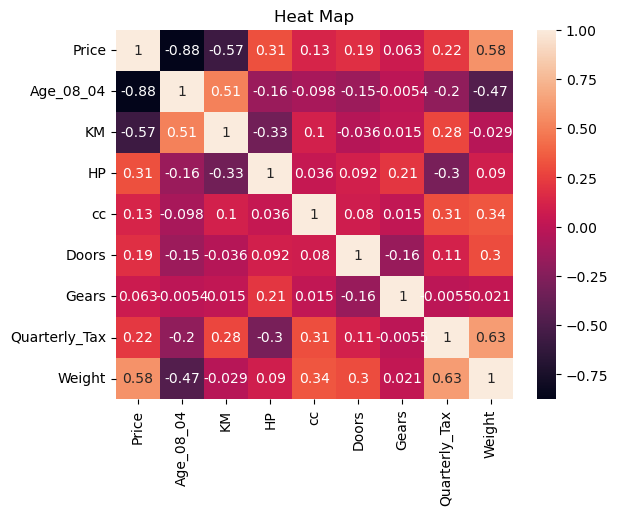

In [17]:
path = "D:/Multi_Linear_Regression/Prj_4"
file_path = os.path.join(path, 'Heat_Map.png')
c = df1[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]].corr()
sns.heatmap(c, annot=True)
plt.title('Heat Map')
plt.savefig(file_path)
plt.show()

In [ ]:
# Heat map shows the correlation between the variables, here we can see that
# Price is more correlated with 'AGE', 'Weight', 'HP' and 'KM' and 
# less correlated with 'Quarterly_Tax', 'Gears', 'Door' and 'cc'
# so for accurate predictions we can take 'Age', 'Weight', 'HP', 'Km' as independent varibles
# and 'price' as my dependent variables

# Box plot

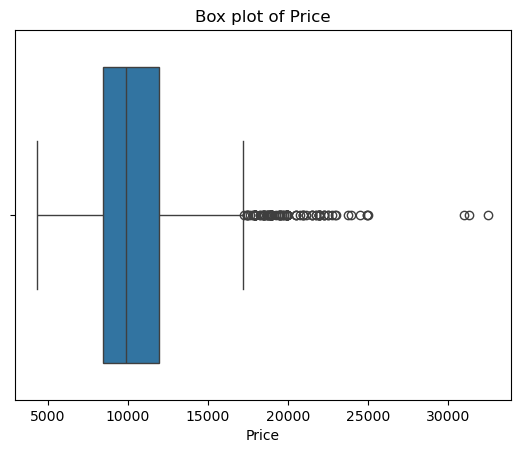

In [22]:
path = "D:/Multi_Linear_Regression/Prj_4"
file_path = os.path.join(path, 'Box_plot.png')
sns.boxplot(x = 'Price', data = df1)
plt.xlabel('Price')
plt.title("Box plot of Price")
plt.savefig(file_path)
plt.show()

In [ ]:
# It shows that there are huge no of outliers

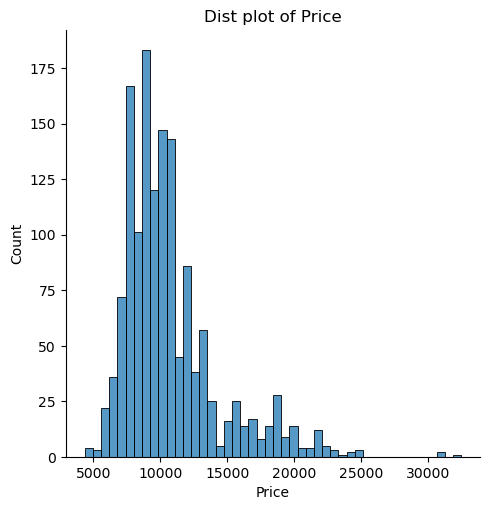

In [28]:
path = "D:/Multi_Linear_Regression/Prj_4"
file_path = os.path.join(path, 'Dist_plot.png')
sns.displot(df1['Price'])
plt.xlabel('Price')
plt.title("Dist plot of Price")
plt.savefig(file_path)
plt.show()

In [29]:
from scipy.stats import skew
skewness = skew(df1['Price'])
print(f'Skewness of Price: {round(skewness,2)}')

Skewness of Price: 1.7


In [30]:
# It is moderate positive skew, slightly in the right side

In [31]:
q1 = df1['Price'].quantile(0.25)
print(f"The Q1 value is {q1}")
q3 = df1['Price'].quantile(0.75)
print(f"The Q3 value is {q3}")
IQR = q3 - q1
print(f"The IQR value is {IQR}")
upper = q3 + (1.5*IQR)
print(f"The Upper threshold value is {upper}")
lower = q1 - (1.5*IQR)
print(f"The Lower threshold value is {lower}")

The Q1 value is 8450.0
The Q3 value is 11950.0
The IQR value is 3500.0
The Upper threshold value is 17200.0
The Lower threshold value is 3200.0


In [32]:
outliers = df1[(df1['Price']<lower) | (df1['Price']>upper)]
print(f'The number of outliers in the data is {len(outliers)} out of {len(df1)}')
percent = (len(outliers)/len(df1))*100
print(f'The percentage of Price outliers is {percent}')

The number of outliers in the data is 110 out of 1436
The percentage of Price outliers is 7.66016713091922


In [33]:
# We can see that there are 8 per cent of data are outliers so we can impute that with upper threshold value
# If we see the box, the outliers are only in the upper side not on the lower side

In [37]:
df1.loc[df1['Price'] > 17200, 'Price'] = 17200

In [38]:
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Profit
0,13500,23,46986,90,2000,3,5,210,1165,NaN
1,13750,23,72937,90,2000,3,5,210,1165,NaN
2,13950,24,41711,90,2000,3,5,210,1165,NaN
3,14950,26,48000,90,2000,3,5,210,1165,NaN
4,13750,30,38500,90,2000,3,5,210,1170,NaN
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025,NaN
1432,10845,72,19000,86,1300,3,5,69,1015,NaN
1433,8500,71,17016,86,1300,3,5,69,1015,NaN
1434,7250,70,16916,86,1300,3,5,69,1015,NaN


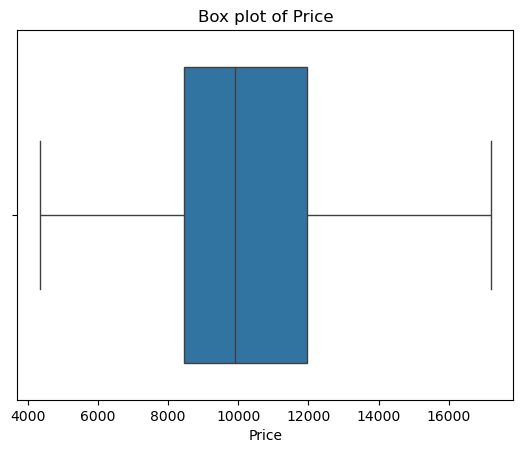

In [39]:
path = "D:/Multi_Linear_Regression/Prj_4"
file_path = os.path.join(path, 'Box_plot_after_imputation.png')
sns.boxplot(x = 'Price', data = df1)
plt.xlabel('Price')
plt.title("Box plot of Price")
plt.savefig(file_path)
plt.show()

In [40]:
# No outliers 

# Model Planning

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
lr = LinearRegression()

In [42]:
df1.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight', 'Profit'],
      dtype='object')

In [43]:
x = df[['Age_08_04', 'KM', 'HP', 'Weight']]
x.head()

,Age_08_04,KM,HP,Weight
0,23,46986,90,1165
1,23,72937,90,1165
2,24,41711,90,1165
3,26,48000,90,1165
4,30,38500,90,1170


In [45]:
y = df1['Price']
y.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8)

In [47]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1148, 4), (1148,), (288, 4), (288,))

In [48]:
model = lr.fit(x_train, y_train)

In [49]:
lr.coef_

array([-1.18367855e+02, -1.36593836e-02,  1.92288572e+01,  6.89846669e+00])

In [50]:
lr.intercept_

8712.83361116136

In [51]:
pred = model.predict(x_test)

In [52]:
df2 = pd.DataFrame(pred, columns=['Predicted'])

In [53]:
df2['Actual'] = y_test.values

In [54]:
df2

,Predicted,Actual
0,8857.641006,9750
1,8161.489759,8500
2,8958.789318,8950
3,14543.748112,16900
4,7109.695852,8250
...,...,...
283,17047.009569,17200
284,7979.600991,8950
285,14567.325636,15950
286,7015.153184,8750


In [55]:
r2 = round(r2_score(df2['Actual'], df2['Predicted']), 4)
print(f'The Strength of the model is {r2}')
rmse = sqrt(mean_squared_error(df2['Actual'], df2['Predicted']))
print(f'The RMSE score of this model is {rmse}')

The Strength of the model is 0.8422
The RMSE score of this model is 1162.3669417508872


In [56]:
print(f'The Accuracy of the model is {r2*100}%, so the prediction with this model is good')

The Accuracy of the model is 84.22%, so the prediction with this model is good
